In [1]:
import json
import difflib
import os

# File paths for input files
input_files = ["context_generation.json", "zero_shot_generation.json", "naive_generation.json"]

# Helper function to generate diff patch
def get_diff_patch(source_code, target_code):
    """Generate a patch based on differences between source and target code."""
    diff = difflib.unified_diff(
        source_code.splitlines(), 
        target_code.splitlines(), 
        lineterm="", 
        n=0
    )
    return "\n".join(diff)

# Process each file
for input_file in input_files:
    # Load the data
    with open(input_file, "r") as f:
        data = json.load(f)
    
    # Process each item to add generated_patch and ground_truth_patch
    for item in data:
        item['generated_patch'] = get_diff_patch(item['code_to_be_optimized'], item['generated_code'])
        item['ground_truth_patch'] = get_diff_patch(item['code_to_be_optimized'], item['groundtruth_code'])
    
    # Define output file name
    output_file = f"processed_{os.path.splitext(input_file)[0]}.json"
    
    # Save the processed data with new keys
    with open(output_file, "w") as f:
        json.dump(data, f, indent=4)
    
    print(f"Processed data saved to {output_file}")

Processed data saved to processed_context_generation.json
Processed data saved to processed_zero_shot_generation.json
Processed data saved to processed_naive_generation.json


In [2]:
import json
import os

# Processed files to analyze
processed_files = ["processed_context_generation.json", "processed_zero_shot_generation.json", "processed_naive_generation.json"]

def calculate_exact_match_rate(file_path):
    """Calculate the exact match rate for generated_patch and ground_truth_patch in a given file."""
    with open(file_path, "r") as f:
        data = json.load(f)
    
    # Count exact matches
    exact_matches = sum(1 for item in data if item['generated_patch'] == item['ground_truth_patch'])
    total_entries = len(data)
    
    # Calculate exact match rate
    exact_match_rate = (exact_matches / total_entries) * 100 if total_entries > 0 else 0
    return exact_match_rate, exact_matches, total_entries

# Analyze each file and print results
results = {}
for file in processed_files:
    match_rate, exact_matches, total_entries = calculate_exact_match_rate(file)
    results[file] = {
        "exact_match_rate": match_rate,
        "exact_matches": exact_matches,
        "total_entries": total_entries
    }
    print(f"File: {file}")
    print(f"Exact Match Rate: {match_rate:.2f}%")
    print(f"Exact Matches: {exact_matches}/{total_entries}\n")

# Optional: Save results to a summary file
output_summary_file = "exact_match_summary.json"
with open(output_summary_file, "w") as f:
    json.dump(results, f, indent=4)

print(f"Summary saved to {output_summary_file}")

File: processed_context_generation.json
Exact Match Rate: 0.00%
Exact Matches: 0/152

File: processed_zero_shot_generation.json
Exact Match Rate: 0.00%
Exact Matches: 0/152

File: processed_naive_generation.json
Exact Match Rate: 0.00%
Exact Matches: 0/152

Summary saved to exact_match_summary.json


In [3]:
import json
import os

# Processed files to analyze
processed_files = ["processed_context_generation.json", "processed_zero_shot_generation.json", "processed_naive_generation.json"]

def calculate_containment_match_rate(file_path):
    """Calculate the match rate where ground_truth_patch is contained within generated_patch."""
    with open(file_path, "r") as f:
        data = json.load(f)
    
    # Count containment matches
    containment_matches = sum(1 for item in data if item['ground_truth_patch'] in item['generated_patch'])
    total_entries = len(data)
    
    # Calculate containment match rate
    containment_match_rate = (containment_matches / total_entries) * 100 if total_entries > 0 else 0
    return containment_match_rate, containment_matches, total_entries

# Analyze each file and print results
results = {}
for file in processed_files:
    match_rate, containment_matches, total_entries = calculate_containment_match_rate(file)
    results[file] = {
        "containment_match_rate": match_rate,
        "containment_matches": containment_matches,
        "total_entries": total_entries
    }
    print(f"File: {file}")
    print(f"Containment Match Rate: {match_rate:.2f}%")
    print(f"Containment Matches: {containment_matches}/{total_entries}\n")

# Optional: Save results to a summary file
output_summary_file = "containment_match_summary.json"
with open(output_summary_file, "w") as f:
    json.dump(results, f, indent=4)

print(f"Summary saved to {output_summary_file}")

File: processed_context_generation.json
Containment Match Rate: 0.00%
Containment Matches: 0/152

File: processed_zero_shot_generation.json
Containment Match Rate: 0.00%
Containment Matches: 0/152

File: processed_naive_generation.json
Containment Match Rate: 0.00%
Containment Matches: 0/152

Summary saved to containment_match_summary.json


In [5]:
import json
import os
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import jaccard_score

# Processed files to analyze
processed_files = ["processed_context_generation.json", "processed_zero_shot_generation.json", "processed_naive_generation.json"]

def calculate_similarity_match_rate(file_path, threshold=0.7):
    """Calculate the similarity match rate using Jaccard similarity between generated_patch and ground_truth_patch."""
    with open(file_path, "r") as f:
        data = json.load(f)
    
    vectorizer = CountVectorizer(analyzer='char', ngram_range=(2, 2))  # Use character-level bigrams
    similarity_matches = 0
    total_entries = len(data)
    
    for item in data:
        generated_patch = item['generated_patch']
        ground_truth_patch = item['ground_truth_patch']
        
        # Transform patches into vectorized form
        patches_vector = vectorizer.fit_transform([generated_patch, ground_truth_patch])
        
        # Calculate Jaccard similarity with 'micro' average for multiclass data
        similarity = jaccard_score(patches_vector[0].toarray()[0], patches_vector[1].toarray()[0], average='micro')
        
        # Check if similarity meets the threshold
        if similarity >= threshold:
            similarity_matches += 1

    # Calculate similarity match rate
    similarity_match_rate = (similarity_matches / total_entries) * 100 if total_entries > 0 else 0
    return similarity_match_rate, similarity_matches, total_entries

# Analyze each file and print results
results = {}
for file in processed_files:
    match_rate, similarity_matches, total_entries = calculate_similarity_match_rate(file)
    results[file] = {
        "similarity_match_rate": match_rate,
        "similarity_matches": similarity_matches,
        "total_entries": total_entries
    }
    print(f"File: {file}")
    print(f"Similarity Match Rate: {match_rate:.2f}%")
    print(f"Similarity Matches: {similarity_matches}/{total_entries}\n")

# Optional: Save results to a summary file
output_summary_file = "similarity_match_summary.json"
with open(output_summary_file, "w") as f:
    json.dump(results, f, indent=4)

print(f"Summary saved to {output_summary_file}")

File: processed_context_generation.json
Similarity Match Rate: 0.00%
Similarity Matches: 0/152

File: processed_zero_shot_generation.json
Similarity Match Rate: 0.00%
Similarity Matches: 0/152

File: processed_naive_generation.json
Similarity Match Rate: 0.00%
Similarity Matches: 0/152

Summary saved to similarity_match_summary.json


In [6]:
import json

# Define the paths to the three files
file_paths = [
    "processed_context_generation.json",
    "processed_zero_shot_generation.json",
    "processed_naive_generation.json"
]

# Dictionary to hold the content of each file
file_contents = {}

# Load each file into the dictionary
for path in file_paths:
    with open(path, "r") as f:
        file_contents[path] = json.load(f)

# The file_contents dictionary now holds the data of each file.
# You can access each file's data by using file_contents["filename.json"]
# For example:
# context_generation_data = file_contents["processed_context_generation.json"]
# zero_shot_generation_data = file_contents["processed_zero_shot_generation.json"]
# naive_generation_data = file_contents["processed_naive_generation.json"]


In [7]:
file_contents["processed_context_generation.json"]

[{'id': 1,
  'code_to_be_optimized': '#include<iostream>\n\n#include <string.h>\n\n#include<string>\n\n#include <map> \n\n#include <utility> \n\n\n\n\n\nusing namespace std;\n\n\n\nint main()\n\n{\n\n\t/*long long h, a, attacks = 0;\n\n\tcin >> h >> a;\n\n\twhile (h > 0)\n\n\t{\n\n\tattacks++;\n\n\th -= a;\n\n\t}\n\n\tcout << attacks << endl;*/\n\n\t/*long long n;\n\n\tstring s;\n\n\tcin >> n;\n\n\tgetline(cin, s);\n\n\tgetline(cin, s);\n\n\tchar currentchar = s[0];\n\n\tint cnt = 1;\n\n\n\n\tfor (int i = 1; i < s.size(); i++)\n\n\t{\n\n\tif (s[i] != currentchar)\n\n\t{\n\n\tcurrentchar = s[i];\n\n\tcnt++;\n\n\t}\n\n\t}\n\n\n\n\tcout << cnt << endl;*/\n\n\n\n\t/*int a, b, c;\n\n\tcin >> a >> b >> c;\n\n\tif ((a == b && a != c) || (a == c && a!=b) || (b == c && b!=a))\n\n\tcout << "Yes" << endl;\n\n\telse\n\n\tcout << "No" << endl;*/\n\n\n\n\t/*string S;\n\n\tgetline(cin, S);\n\n\t//getline(cin, S);\n\n\tbool StingEnd = false;\n\n\n\n\twhile (true)\n\n\t{\n\n\tint i;\n\n\tif (S.empty())

In [10]:
# import pandas as pd
# import json
# from difflib import SequenceMatcher
# from sklearn.feature_extraction.text import CountVectorizer

# # Load the JSON files
# with open("generated_patch.json", "r") as f:
#     generated_data = json.load(f)

# with open("ground_truth_patch.json", "r") as f:
#     ground_truth_data = json.load(f)

# with open("other_data.json", "r") as f:
#     other_data = json.load(f)

# # Convert JSON data to DataFrames
# df_generated = pd.DataFrame(generated_data)
# df_ground_truth = pd.DataFrame(ground_truth_data)
# df_other = pd.DataFrame(other_data)

# # Merge DataFrames on a common key; replace 'id' with the actual common key
# df_combined = df_generated.merge(df_ground_truth, on='id', suffixes=('_generated', '_ground_truth'))
# df_combined = df_combined.merge(df_other, on='id')

# # Define match metric functions
# def line_overlap(generated, ground_truth):
#     generated_lines = set(generated.splitlines())
#     ground_truth_lines = set(ground_truth.splitlines())
#     overlap = len(generated_lines.intersection(ground_truth_lines))
#     total = len(generated_lines.union(ground_truth_lines))
#     return overlap / total if total > 0 else 0

# def edit_distance_similarity(generated, ground_truth):
#     return SequenceMatcher(None, generated, ground_truth).ratio()

# def token_overlap(generated, ground_truth):
#     vectorizer = CountVectorizer().fit([generated, ground_truth])
#     generated_tokens = set(vectorizer.transform([generated]).toarray()[0].nonzero()[0])
#     ground_truth_tokens = set(vectorizer.transform([ground_truth]).toarray()[0].nonzero()[0])
#     overlap = len(generated_tokens.intersection(ground_truth_tokens))
#     total = len(generated_tokens.union(ground_truth_tokens))
#     return overlap / total if total > 0 else 0

# def compute_match_metric(generated, ground_truth):
#     line_score = line_overlap(generated, ground_truth)
#     edit_score = edit_distance_similarity(generated, ground_truth)
#     token_score = token_overlap(generated, ground_truth)
#     return 0.4 * line_score + 0.3 * edit_score + 0.3 * token_score

# # Calculate the match metric for each row
# df_combined['match_metric'] = df_combined.apply(
#     lambda x: compute_match_metric(x['patch_generated'], x['patch_ground_truth']), axis=1
# )

# # Display or save the final DataFrame with match metric
# print(df_combined[['id', 'patch_generated', 'patch_ground_truth', 'match_metric']])
# # df_combined.to_csv("output_with_match_metric.csv", index=False)  # Uncomment to save

In [11]:
import json
from difflib import SequenceMatcher
from sklearn.feature_extraction.text import CountVectorizer

# Load JSON files
with open("processed_context_generation.json") as f:
    context_generation_data = json.load(f)

with open("processed_zero_shot_generation.json") as f:
    zero_shot_generation_data = json.load(f)

with open("processed_naive_generation.json") as f:
    naive_generation_data = json.load(f)

# Organize data by ID for easier matching
def organize_data_by_id(data):
    return {item['id']: item for item in data}

context_data = organize_data_by_id(context_generation_data)
zero_shot_data = organize_data_by_id(zero_shot_generation_data)
naive_data = organize_data_by_id(naive_generation_data)

# Define match metric functions
def line_overlap(generated, ground_truth):
    generated_lines = set(generated.splitlines())
    ground_truth_lines = set(ground_truth.splitlines())
    overlap = len(generated_lines.intersection(ground_truth_lines))
    total = len(generated_lines.union(ground_truth_lines))
    return overlap / total if total > 0 else 0

def edit_distance_similarity(generated, ground_truth):
    return SequenceMatcher(None, generated, ground_truth).ratio()

def token_overlap(generated, ground_truth):
    vectorizer = CountVectorizer().fit([generated, ground_truth])
    generated_tokens = set(vectorizer.transform([generated]).toarray()[0].nonzero()[0])
    ground_truth_tokens = set(vectorizer.transform([ground_truth]).toarray()[0].nonzero()[0])
    overlap = len(generated_tokens.intersection(ground_truth_tokens))
    total = len(generated_tokens.union(ground_truth_tokens))
    return overlap / total if total > 0 else 0

# Compute the three metrics for each generation type
def compute_metrics(ref_data, gen_data):
    line_overlap_scores, edit_distance_scores, token_overlap_scores = [], [], []
    matched_ids = set(ref_data.keys()) & set(gen_data.keys())
    
    for id in matched_ids:
        ground_truth = ref_data[id]['groundtruth_code']
        generated = gen_data[id]['generated_code']
        
        line_overlap_scores.append(line_overlap(generated, ground_truth))
        edit_distance_scores.append(edit_distance_similarity(generated, ground_truth))
        token_overlap_scores.append(token_overlap(generated, ground_truth))
    
    avg_line_overlap = sum(line_overlap_scores) / len(line_overlap_scores) if line_overlap_scores else 0
    avg_edit_distance = sum(edit_distance_scores) / len(edit_distance_scores) if edit_distance_scores else 0
    avg_token_overlap = sum(token_overlap_scores) / len(token_overlap_scores) if token_overlap_scores else 0
    
    return avg_line_overlap, avg_edit_distance, avg_token_overlap

# Calculate metrics for context vs zero-shot and context vs naive
context_vs_zero_metrics = compute_metrics(context_data, zero_shot_data)
context_vs_naive_metrics = compute_metrics(context_data, naive_data)

# Display results
print("Context vs Zero-Shot Generation Metrics:")
print(f"Line Overlap: {context_vs_zero_metrics[0]}")
print(f"Edit Distance Similarity: {context_vs_zero_metrics[1]}")
print(f"Token Overlap: {context_vs_zero_metrics[2]}")

print("\nContext vs Naive Generation Metrics:")
print(f"Line Overlap: {context_vs_naive_metrics[0]}")
print(f"Edit Distance Similarity: {context_vs_naive_metrics[1]}")
print(f"Token Overlap: {context_vs_naive_metrics[2]}")

Context vs Zero-Shot Generation Metrics:
Line Overlap: 0
Edit Distance Similarity: 0
Token Overlap: 0

Context vs Naive Generation Metrics:
Line Overlap: 0.08105331731873257
Edit Distance Similarity: 0.14582366772309333
Token Overlap: 0.3512169290073725


In [12]:
import json
from difflib import SequenceMatcher
from sklearn.feature_extraction.text import CountVectorizer

# Load JSON files
with open("processed_context_generation.json") as f:
    context_generation_data = json.load(f)

with open("processed_zero_shot_generation.json") as f:
    zero_shot_generation_data = json.load(f)

with open("processed_naive_generation.json") as f:
    naive_generation_data = json.load(f)

# Define match metric functions
def line_overlap(generated, ground_truth):
    generated_lines = set(generated.splitlines())
    ground_truth_lines = set(ground_truth.splitlines())
    overlap = len(generated_lines.intersection(ground_truth_lines))
    total = len(generated_lines.union(ground_truth_lines))
    return overlap / total if total > 0 else 0

def edit_distance_similarity(generated, ground_truth):
    return SequenceMatcher(None, generated, ground_truth).ratio()

def token_overlap(generated, ground_truth):
    vectorizer = CountVectorizer().fit([generated, ground_truth])
    generated_tokens = set(vectorizer.transform([generated]).toarray()[0].nonzero()[0])
    ground_truth_tokens = set(vectorizer.transform([ground_truth]).toarray()[0].nonzero()[0])
    overlap = len(generated_tokens.intersection(ground_truth_tokens))
    total = len(generated_tokens.union(generated_tokens))
    return overlap / total if total > 0 else 0

# Compute the three metrics for each dataset independently
def compute_metrics(data):
    line_overlap_scores, edit_distance_scores, token_overlap_scores = [], [], []
    
    for item in data:
        ground_truth = item['groundtruth_code']
        generated = item['generated_code']
        
        line_overlap_scores.append(line_overlap(generated, ground_truth))
        edit_distance_scores.append(edit_distance_similarity(generated, ground_truth))
        token_overlap_scores.append(token_overlap(generated, ground_truth))
    
    avg_line_overlap = sum(line_overlap_scores) / len(line_overlap_scores) if line_overlap_scores else 0
    avg_edit_distance = sum(edit_distance_scores) / len(edit_distance_scores) if edit_distance_scores else 0
    avg_token_overlap = sum(token_overlap_scores) / len(token_overlap_scores) if token_overlap_scores else 0
    
    return avg_line_overlap, avg_edit_distance, avg_token_overlap

# Calculate metrics for each dataset
context_metrics = compute_metrics(context_generation_data)
zero_shot_metrics = compute_metrics(zero_shot_generation_data)
naive_metrics = compute_metrics(naive_generation_data)

# Display results
print("Context Generation Metrics:")
print(f"Line Overlap: {context_metrics[0]}")
print(f"Edit Distance Similarity: {context_metrics[1]}")
print(f"Token Overlap: {context_metrics[2]}")

print("\nZero-Shot Generation Metrics:")
print(f"Line Overlap: {zero_shot_metrics[0]}")
print(f"Edit Distance Similarity: {zero_shot_metrics[1]}")
print(f"Token Overlap: {zero_shot_metrics[2]}")

print("\nNaive Generation Metrics:")
print(f"Line Overlap: {naive_metrics[0]}")
print(f"Edit Distance Similarity: {naive_metrics[1]}")
print(f"Token Overlap: {naive_metrics[2]}")

Context Generation Metrics:
Line Overlap: 0.08531755252191923
Edit Distance Similarity: 0.1654289024260325
Token Overlap: 0.5990793838840157

Zero-Shot Generation Metrics:
Line Overlap: 0.08167206033232458
Edit Distance Similarity: 0.14567750023630585
Token Overlap: 0.5451242676835691

Naive Generation Metrics:
Line Overlap: 0.08105331731873257
Edit Distance Similarity: 0.14582366772309333
Token Overlap: 0.5520873904368857


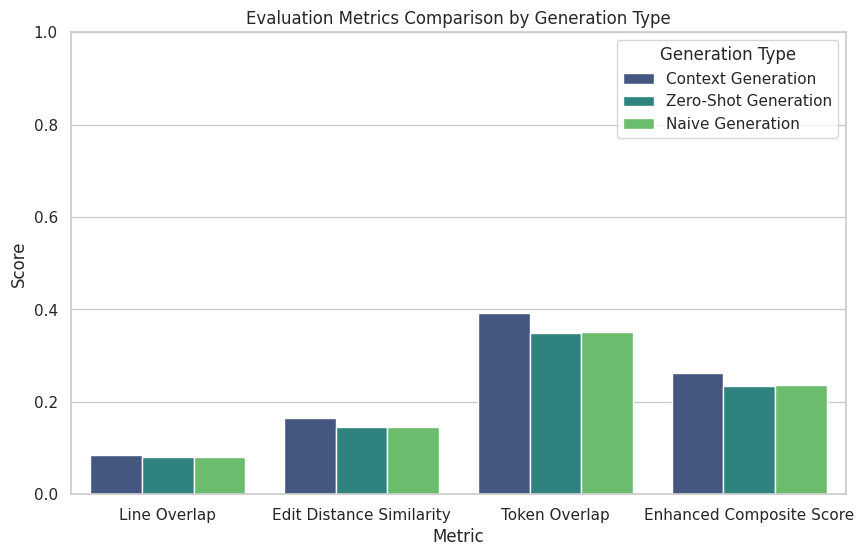

In [13]:
import json
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from difflib import SequenceMatcher

# Define match metric functions
def line_overlap(generated, ground_truth):
    generated_lines = set(generated.splitlines())
    ground_truth_lines = set(ground_truth.splitlines())
    overlap = len(generated_lines.intersection(ground_truth_lines))
    total = len(generated_lines.union(ground_truth_lines))
    return overlap / total if total > 0 else 0

def edit_distance_similarity(generated, ground_truth):
    return SequenceMatcher(None, generated, ground_truth).ratio()

def token_overlap(generated, ground_truth):
    vectorizer = CountVectorizer().fit([generated, ground_truth])
    generated_tokens = set(vectorizer.transform([generated]).toarray()[0].nonzero()[0])
    ground_truth_tokens = set(vectorizer.transform([ground_truth]).toarray()[0].nonzero()[0])
    overlap = len(generated_tokens.intersection(ground_truth_tokens))
    total = len(generated_tokens.union(ground_truth_tokens))
    return overlap / total if total > 0 else 0

# Function to compute metrics for a dataset
def compute_metrics(dataset):
    line_overlap_score = sum(line_overlap(item['generated_code'], item['groundtruth_code']) for item in dataset) / len(dataset)
    edit_distance_score = sum(edit_distance_similarity(item['generated_code'], item['groundtruth_code']) for item in dataset) / len(dataset)
    token_overlap_score = sum(token_overlap(item['generated_code'], item['groundtruth_code']) for item in dataset) / len(dataset)
    return line_overlap_score, edit_distance_score, token_overlap_score

# Calculate the enhanced composite score
def enhanced_composite_score(line_overlap_score, edit_distance_score, token_overlap_score, weights):
    return (weights[0] * line_overlap_score) + (weights[1] * edit_distance_score) + (weights[2] * token_overlap_score)

# Load data from JSON files
with open("processed_context_generation.json", "r") as f:
    context_generation_data = json.load(f)

with open("processed_zero_shot_generation.json", "r") as f:
    zero_shot_generation_data = json.load(f)

with open("processed_naive_generation.json", "r") as f:
    naive_generation_data = json.load(f)

# Compute metrics for each generation type
context_line, context_edit, context_token = compute_metrics(context_generation_data)
zero_shot_line, zero_shot_edit, zero_shot_token = compute_metrics(zero_shot_generation_data)
naive_line, naive_edit, naive_token = compute_metrics(naive_generation_data)

# Define weights for enhanced metric
weights = [0.2, 0.3, 0.5]  # Customize weights as needed

# Compute composite scores
context_score = enhanced_composite_score(context_line, context_edit, context_token, weights)
zero_shot_score = enhanced_composite_score(zero_shot_line, zero_shot_edit, zero_shot_token, weights)
naive_score = enhanced_composite_score(naive_line, naive_edit, naive_token, weights)

# Prepare data for visualization
scores = {
    'Metric': ['Line Overlap', 'Edit Distance Similarity', 'Token Overlap', 'Enhanced Composite Score'],
    'Context Generation': [context_line, context_edit, context_token, context_score],
    'Zero-Shot Generation': [zero_shot_line, zero_shot_edit, zero_shot_token, zero_shot_score],
    'Naive Generation': [naive_line, naive_edit, naive_token, naive_score]
}

# Convert data to a DataFrame for seaborn visualization
import pandas as pd
scores_df = pd.DataFrame(scores)

# Melt the DataFrame for seaborn
melted_scores_df = scores_df.melt(id_vars='Metric', var_name='Generation Type', value_name='Score')

# Plot using seaborn
sns.set_theme(style="whitegrid")
plt.figure(figsize=(10, 6))
barplot = sns.barplot(x='Metric', y='Score', hue='Generation Type', data=melted_scores_df, palette="viridis")
barplot.set_title("Evaluation Metrics Comparison by Generation Type")
plt.legend(title='Generation Type')
plt.ylim(0, 1)
plt.show()


In [ ]:
import json
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from difflib import SequenceMatcher
import pandas as pd

# Define match metric functions
def line_overlap(generated, ground_truth):
    generated_lines = set(generated.splitlines())
    ground_truth_lines = set(ground_truth.splitlines())
    overlap = len(generated_lines.intersection(ground_truth_lines))
    total = len(generated_lines.union(ground_truth_lines))
    return overlap / total if total > 0 else 0

def edit_distance_similarity(generated, ground_truth):
    return SequenceMatcher(None, generated, ground_truth).ratio()

def token_overlap(generated, ground_truth):
    vectorizer = CountVectorizer().fit([generated, ground_truth])
    generated_tokens = set(vectorizer.transform([generated]).toarray()[0].nonzero()[0])
    ground_truth_tokens = set(vectorizer.transform([ground_truth]).toarray()[0].nonzero()[0])
    overlap = len(generated_tokens.intersection(ground_truth_tokens))
    total = len(generated_tokens.union(ground_truth_tokens))
    return overlap / total if total > 0 else 0

# Function to compute metrics for a dataset
def compute_metrics(dataset):
    line_overlap_score = sum(line_overlap(item['generated_code'], item['groundtruth_code']) for item in dataset) / len(dataset)
    edit_distance_score = sum(edit_distance_similarity(item['generated_code'], item['groundtruth_code']) for item in dataset) / len(dataset)
    token_overlap_score = sum(token_overlap(item['generated_code'], item['groundtruth_code']) for item in dataset) / len(dataset)
    return line_overlap_score, edit_distance_score, token_overlap_score

# Calculate the enhanced composite score
def enhanced_composite_score(line_overlap_score, edit_distance_score, token_overlap_score, weights):
    return (weights[0] * line_overlap_score) + (weights[1] * edit_distance_score) + (weights[2] * token_overlap_score)

# Load data from JSON files
with open("processed_context_generation.json", "r") as f:
    context_generation_data = json.load(f)

with open("processed_zero_shot_generation.json", "r") as f:
    zero_shot_generation_data = json.load(f)

with open("processed_naive_generation.json", "r") as f:
    naive_generation_data = json.load(f)

# Compute metrics for each generation type
context_line, context_edit, context_token = compute_metrics(context_generation_data)
zero_shot_line, zero_shot_edit, zero_shot_token = compute_metrics(zero_shot_generation_data)
naive_line, naive_edit, naive_token = compute_metrics(naive_generation_data)

# Define weights for enhanced metric
weights = [0.2, 0.3, 0.5]  # Customize weights as needed

# Compute composite scores
context_score = enhanced_composite_score(context_line, context_edit, context_token, weights)
zero_shot_score = enhanced_composite_score(zero_shot_line, zero_shot_edit, zero_shot_token, weights)
naive_score = enhanced_composite_score(naive_line, naive_edit, naive_token, weights)

# Prepare data for visualization
scores = {
    'Metric': ['Line Overlap', 'Edit Distance Similarity', 'Token Overlap', 'Enhanced Composite Score'],
    'Context Generation': [context_line, context_edit, context_token, context_score],
    'Zero-Shot Generation': [zero_shot_line, zero_shot_edit, zero_shot_token, zero_shot_score],
    'Naive Generation': [naive_line, naive_edit, naive_token, naive_score]
}

# Convert data to a DataFrame for seaborn visualization
scores_df = pd.DataFrame(scores)

# Melt the DataFrame for seaborn
melted_scores_df = scores_df.melt(id_vars='Metric', var_name='Generation Type', value_name='Score')

# Plot with dual y-axes for two groups of metrics
sns.set_theme(style="whitegrid")

# Set up the figure
fig, ax1 = plt.subplots(figsize=(10, 6))

# Define colors for different y-axes
palette = {"Context Generation": "b", "Zero-Shot Generation": "g", "Naive Generation": "r"}

# Plot Line Overlap and Edit Distance Similarity on the first y-axis
metrics_subset_1 = melted_scores_df[melted_scores_df['Metric'].isin(['Line Overlap', 'Edit Distance Similarity'])]
sns.barplot(x='Metric', y='Score', hue='Generation Type', data=metrics_subset_1, ax=ax1, palette=palette)
ax1.set_ylim(0.07, 0.18)
ax1.set_ylabel("Line Overlap & Edit Distance Similarity Scores")
ax1.set_title("Evaluation Metrics Comparison by Generation Type")

# Create the second y-axis
ax2 = ax1.twinx()

# Plot Token Overlap and Enhanced Composite Score on the second y-axis
metrics_subset_2 = melted_scores_df[melted_scores_df['Metric'].isin(['Token Overlap', 'Enhanced Composite Score'])]
sns.barplot(x='Metric', y='Score', hue='Generation Type', data=metrics_subset_2, ax=ax2, palette=palette, dodge=True)
ax2.set_ylim(0.3, 0.5)
ax2.set_ylabel("Token Overlap & Enhanced Composite Score")

# Hide the legend from ax2 and adjust the layout
ax1.legend(loc='upper left', title="Generation Type")
ax2.legend_.remove()
plt.tight_layout()
plt.show()